<a href="https://colab.research.google.com/github/sarim711/image_classification/blob/main/medmnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MedMNIST Data reading

In [ ]:
# Source: https://github.com/MedMNIST/MedMNIST/

# Install medmnist lib
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [ ]:
# load libs and modules related to medmnist
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator

# Load dermamnist dataset from MedMNIST

In [ ]:
print(INFO.keys())

dict_keys(['pathmnist', 'chestmnist', 'dermamnist', 'octmnist', 'pneumoniamnist', 'retinamnist', 'breastmnist', 'bloodmnist', 'tissuemnist', 'organamnist', 'organcmnist', 'organsmnist', 'organmnist3d', 'nodulemnist3d', 'adrenalmnist3d', 'fracturemnist3d', 'vesselmnist3d', 'synapsemnist3d'])


In [ ]:
data_flag = 'dermamnist'
download = True


info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [ ]:
print(info)

{'python_class': 'DermaMNIST', 'description': 'The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.', 'url': 'https://zenodo.org/records/10519652/files/dermamnist.npz?download=1', 'MD5': '0744692d530f8e62ec473284d019b0c7', 'url_64': 'https://zenodo.org/records/10519652/files/dermamnist_64.npz?download=1', 'MD5_64': 'b70a2f5635c6199aeaa28c31d7202e1f', 'url_128': 'https://zenodo.org/records/10519652/files/dermamnist_128.npz?download=1', 'MD5_128': '2defd784463fa5243564e855ed717de1', 'url_224': 'https://zenodo.org/records/10519652/files/dermamnist_224.npz?download=1', 'MD5_224': '8974907d8e169bef5f5b96bc506ae45d', 'task': 'multi-class', 'la

## MedMNIST dataset reading, preprocessing and encapsulating them into pytorch dataloader

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

In [ ]:
# preprocessing
data_transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness= 0.2, contrast = 0.6, saturation = 0.5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

In [ ]:
BATCH_SIZE = 128

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

100%|██████████| 19.7M/19.7M [00:03<00:00, 6.49MB/s]


In [ ]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0
Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 200

In [ ]:
# visualization
train_dataset.montage(length=1)

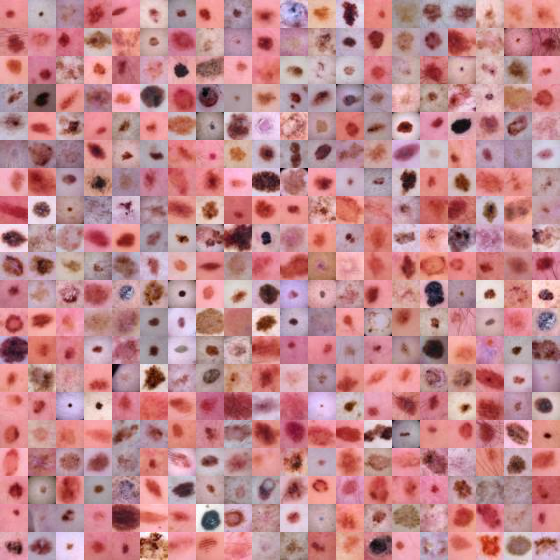

In [ ]:
# montage
train_dataset.montage(length=20)

In [ ]:

print(n_classes)

7


In [ ]:
# model config
NUM_EPOCHS = 3
lr = 0.001

In [ ]:
class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = Net(in_channels=n_channels, num_classes=n_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


## Train and evaluate the model

In [ ]:
def train_model(model, dataloader, criterion, optimizer, num_epochs):
  for epoch in range(num_epochs):
      train_correct = 0
      train_total = 0
      test_correct = 0
      test_total = 0

      model.train()
      for inputs, targets in tqdm(dataloader):
          # forward pass
          optimizer.zero_grad()
          outputs = model(inputs)

          # compute loss
          targets = targets.squeeze().long()
          loss = criterion(outputs, targets)

          # backward pass + optimization step
          loss.backward()
          optimizer.step()


train_model(model=model, dataloader=train_loader, criterion=criterion, optimizer=optimizer, num_epochs=NUM_EPOCHS)

100%|██████████| 55/55 [00:18<00:00,  2.90it/s]


In [ ]:
# evaluation

def test(split):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])

    data_loader = train_loader_at_eval if split == 'train' else test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()

        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)

        print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))

print('==> Evaluating ...')
test('train')
test('test')

==> Evaluating ...
train  auc: 0.835  acc:0.691
test  auc: 0.841  acc:0.692


In [ ]:
from torchvision import models
from torch.utils.data import DataLoader

# Load a pre-trained ResNet-18 model
resnet18 = models.resnet18(weights=None)

# Modify the final layer to match the number of classes in task
resnet18.fc = nn.Linear(resnet18.fc.in_features, n_classes)


# Define the optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=lr, momentum=0.9)

# Preprocessing pipeline
data_transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load the dataset
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

# Train the model
def train_model(model, dataloader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        train_correct = 0
        train_total = 0
        for inputs, targets in tqdm(dataloader):

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)

            # Compute loss
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

            # Backward pass and optimization step
            loss.backward()
            optimizer.step()

train_model(resnet18, train_loader, criterion, optimizer, num_epochs=NUM_EPOCHS)



100%|██████████| 55/55 [01:11<00:00,  1.30s/it]


In [ ]:
# Evaluate the trained model
def evaluate_model(model,split, task='multiclass'):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    data_loader = train_loader_at_eval if split == 'train' else test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

    y_true = y_true.cpu().numpy()
    y_score = y_score.cpu().numpy()

    evaluator = Evaluator(data_flag, split)
    metrics = evaluator.evaluate(y_score)

    print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))

# Test the model
print('==> Evaluating the model on train data...')
evaluate_model(resnet18,'train',task = 'multi-class',)

print('==> Evaluating the model on test data...')
evaluate_model(resnet18,'test',task ='multi-class')

==> Evaluating the model on train data...
train  auc: 0.732  acc:0.672
==> Evaluating the model on test data...
test  auc: 0.739  acc:0.668


In [ ]:
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models

# Load pre-trained ResNet18 model with ImageNet weights
resnet18_pretrained = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modify the final fully connected layer to match the number of output classes
num_ftrs = resnet18_pretrained.fc.in_features
resnet18_pretrained.fc = nn.Linear(num_ftrs, n_classes)

# Step 1: Freeze all layers except FC (Train FC first)
for param in resnet18_pretrained.parameters():
    param.requires_grad = False  # Freeze all layers

for param in resnet18_pretrained.fc.parameters():
    param.requires_grad = True  # Train only FC layer first

# Define loss function
criterion = nn.CrossEntropyLoss()

# Optimizer for FC layer (higher learning rate)
optimizer = optim.Adam(resnet18_pretrained.fc.parameters(), lr=1e-3)

# Train the FC layer
train_model(resnet18_pretrained, train_loader, criterion, optimizer, num_epochs=5)

#  Unfreeze deeper layers gradually (Fine-tune last block)
for param in resnet18_pretrained.layer4.parameters():
    param.requires_grad = True  # Unfreeze last residual block

# lower learning rate for fine-tuning
optimizer = optim.Adam([
    {'params': resnet18_pretrained.fc.parameters(), 'lr': 1e-3},  # FC learning rate high
    {'params': resnet18_pretrained.layer4.parameters(), 'lr': 1e-4}  # Fine-tune last residual block
])

# Train with last block unfrozen
train_model(resnet18_pretrained, train_loader, criterion, optimizer, num_epochs=5)

#Unfreeze the entire model (Full fine-tuning)
for param in resnet18_pretrained.parameters():
    param.requires_grad = True  # Unfreeze all layers

# Small lr for all layers
optimizer = optim.Adam(resnet18_pretrained.parameters(), lr=1e-5, betas=(0.9, 0.999), eps=1e-8)

# Train with fully unfrozen model
train_model(resnet18_pretrained, train_loader, criterion, optimizer, num_epochs=5)

# Evaluate performance
print('==> Evaluating the model on train data...')
evaluate_model(resnet18_pretrained, 'train', task='multi-class')

print('==> Evaluating the model on test data...')
evaluate_model(resnet18_pretrained, 'test', task='multi-class')


100%|██████████| 55/55 [01:15<00:00,  1.37s/it]


==> Evaluating the model on train data...
train  auc: 0.877  acc:0.726
==> Evaluating the model on test data...
test  auc: 0.872  acc:0.723
